# Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math as mt
import pandas as pd
import ast
import os

# Funções Pertinência


In [2]:
class Variavel:
    def __init__(self, nome, min_valor, max_valor):
        self.nome = nome
        self.min_valor = min_valor
        self.max_valor = max_valor
        self.funcs = {}

    def add_func(self, func):
        mean, sigma, nome = func
        self.funcs[nome] = (mean, sigma)

    def graus_pertinencia(self, valor):
        pertinencia = {}
        for chave, valores in zip(self.funcs.keys(), self.funcs.values()):
            nome, (mean, sigma) = chave, valores
            pertinencia[nome] = mt.e ** (-(valor - mean) ** 2 / (2 * sigma ** 2))
        return pertinencia

    def calc_graus_pertinencia(self, x):
        pertinencias = np.zeros((len(self.funcs), len(x)))
        for idx, (mean, sigma) in enumerate(self.funcs.values()):
            pertinencias[idx] = np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))
        return pertinencias

    def plot(self):
        plt.figure(figsize=(4, 3))
        x = np.linspace(self.min_valor, self.max_valor, 1000)
        for chave, valores in zip(self.funcs.keys(), self.funcs.values()):
            nome, (mean, sigma) = chave, valores
            mf = mt.e ** (-(x - mean) ** 2 / (2 * sigma ** 2))
            plt.plot(x, mf, label=nome)
        plt.legend()
        plt.xlabel('Valores')
        plt.ylabel('Pertinência')
        plt.title(f'Funções de Pertinência {self.nome}')
        plt.show()

## Entradas

### Erro Temperatura

{'NG': 3.7266531720786735e-06, 'NP': 0.028565500784550384, 'PP': 0.8007374029168081, 'PG': 0.24935220877729622}


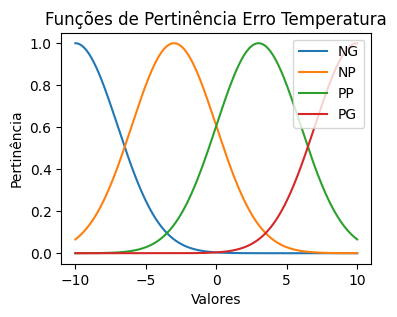

In [3]:
min = -10
max = 10
f1 = (-10, 3, 'NG')
f2 = (-3, 3, 'NP')
f3 = (3, 3, 'PP')
f4 = (10, 3, 'PG')

Temperatura = Variavel("Erro Temperatura", min, max)
Temperatura.add_func(f1)
Temperatura.add_func(f2)
Temperatura.add_func(f3)
Temperatura.add_func(f4)

print(Temperatura.graus_pertinencia(5))

Temperatura.plot()

### Variação Erro Temperatura

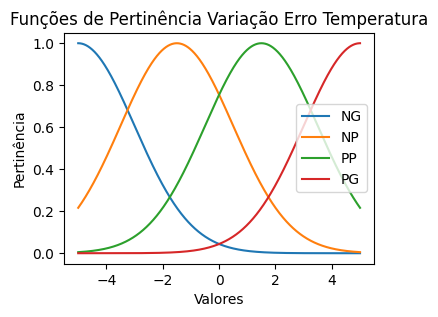

In [4]:
min = -5
max = 5
f1 = (-5, 2, 'NG')
f2 = (-1.5, 2, 'NP')
f3 = (1.5, 2, 'PP')
f4 = (5, 2, 'PG')

VarTemperatura = Variavel("Variação Erro Temperatura", min, max)
VarTemperatura.add_func(f1)
VarTemperatura.add_func(f2)
VarTemperatura.add_func(f3)
VarTemperatura.add_func(f4)

VarTemperatura.plot()

### Erro Humidade

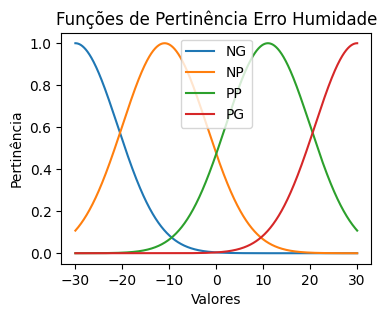

In [5]:
min = -30
max = 30
f1 = (-30, 9, 'NG')
f2 = (-11, 9, 'NP')
f3 = (11, 9, 'PP')
f4 = (30, 9, 'PG')

Humidade = Variavel("Erro Humidade", min, max)
Humidade.add_func(f1)
Humidade.add_func(f2)
Humidade.add_func(f3)
Humidade.add_func(f4)

Humidade.plot()

### Radiação Solar

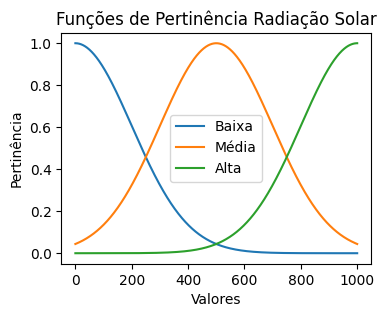

In [6]:
min = 0
max = 1000
f1 = (0, 200, 'Baixa')
f2 = (500, 200, 'Média')
f3 = (1000, 200, 'Alta')

Radiacao = Variavel("Radiação Solar", min, max)
Radiacao.add_func(f1)
Radiacao.add_func(f2)
Radiacao.add_func(f3)

Radiacao.plot()

## Saídas

### Aquecedor

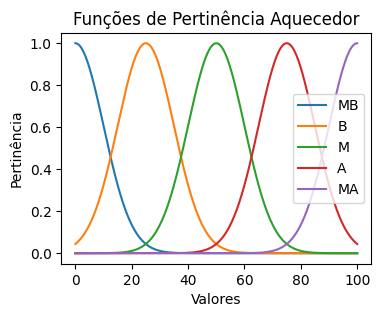

In [7]:
min = 0
max = 100
f1 = (0, 10, 'MB')
f2 = (25, 10, 'B')
f3 = (50, 10, 'M')
f4 = (75, 10, 'A')
f5 = (100, 10, 'MA')

Aquecedor = Variavel("Aquecedor", min, max)
Aquecedor.add_func(f1)
Aquecedor.add_func(f2)
Aquecedor.add_func(f3)
Aquecedor.add_func(f4)
Aquecedor.add_func(f5)

Aquecedor.plot()

### Umidificador

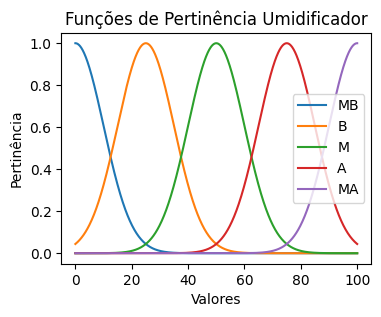

In [8]:
min = 0
max = 100
f1 = (0, 10, 'MB')
f2 = (25, 10, 'B')
f3 = (50, 10, 'M')
f4 = (75, 10, 'A')
f5 = (100, 10, 'MA')

Umidificador = Variavel("Umidificador", min, max)
Umidificador.add_func(f1)
Umidificador.add_func(f2)
Umidificador.add_func(f3)
Umidificador.add_func(f4)
Umidificador.add_func(f5)

Umidificador.plot()

### Janela

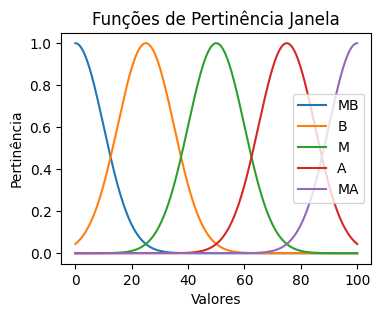

In [9]:
min = 0
max = 100
f1 = (0, 10, 'MB')
f2 = (25, 10, 'B')
f3 = (50, 10, 'M')
f4 = (75, 10, 'A')
f5 = (100, 10, 'MA')

Janela = Variavel("Janela", min, max)
Janela.add_func(f1)
Janela.add_func(f2)
Janela.add_func(f3)
Janela.add_func(f4)
Janela.add_func(f5)

Janela.plot()

# Regras

In [10]:
# (Antecedentes, Consequentes)
# Antecedentes: [(input_var, fuzzy_set), ...]
# Consequentes: [(output_var, fuzzy_set), ...]
rules = [
    # Gelado quase nenhuma humidade
    # Ng + NG + ( Ng  | Np  | Low ) = 100% 100% 0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'B')]),
    # NG + NG + ( Pp        | Med ) = 80%  100% 0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'B')]),
    # NG + NG + ( Pg        | Hig ) = 50%  100% 0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'B')]),
    # Gelado baixa humidade
    # NG + Np + ( Ng  | Np  | Low ) = 100% 60%  0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'M')]),
    # NG + Np + ( Pp        | Med ) = 80%  60%  0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'M')]),
    # NG + Np + ( Pg        | Hig ) = 50%  60%  0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'A'), (Janela.nome, 'M')]),
    # Gelado alta humidade (Aquecedor faz planta transpirar)
    # NG + Pp + ( Ng  | Np  | Low ) = 100% 20%  0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'M'), (Janela.nome, 'A')]),
    # NG + Pp + ( Pp        | Med ) = 80%  0%   0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'M'), (Janela.nome, 'A')]),
    # NG + Pp + ( Pg        | Hig ) = 50%  0%   0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'M'), (Janela.nome, 'A')]),
    # Gelado muito alta humidade (Aquecedor faz planta transpirar) - Nada ideal
    # NG + Pg + ( Ng  | Np  | Low ) = 100% 0%   0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'MB'), (Janela.nome, 'A')]),
    # NG + Pg + ( Pp        | Med ) = 80%  0%   0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'MB'), (Janela.nome, 'A')]),
    # NG + Pg + ( Pg        | Hig ) = 50%  0%   0%
    ([(Temperatura.nome, 'NG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MA'), (Umidificador.nome, 'MB'), (Janela.nome, 'A')]),
    # Frio quase nenhuma humidade
    # Np + NG + ( Ng  | Np  | Low ) = 80%  100% 0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'A'), (Umidificador.nome, 'MA'), (Janela.nome, 'B')]),
    # Np + NG + ( Pp        | Med ) = 60%  100% 0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'M'), (Umidificador.nome, 'MA'), (Janela.nome, 'M')]),
    # Np + NG + ( Pg        | Hig ) = 30%  100% 0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'B'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Frio baixa humidade
    # Np + Np + ( Ng  | Np  | Low ) = 80%  60%  0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'A'), (Umidificador.nome, 'M'), (Janela.nome, 'B')]),
    # Np + Np + ( Pp        | Med ) = 60%  60%  0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'M'), (Umidificador.nome, 'M'), (Janela.nome, 'M')]),
    # Np + Np + ( Pg        | Hig ) = 30%  60%  0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'B'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Frio alta humidade (Aquecedor faz planta transpirar)
    # Np + Pp + ( Ng  | Np  | Low ) = 80%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'A'), (Umidificador.nome, 'MB'), (Janela.nome, 'B')]),
    # Np + Pp + ( Pp        | Med ) = 60%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'M'), (Umidificador.nome, 'B'), (Janela.nome, 'M')]),
    # Np + Pp + ( Pg        | Hig ) = 30%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'B'), (Umidificador.nome, 'M'), (Janela.nome, 'MA')]),
    # Frio muito alta humidade (Aquecedor faz planta transpirar) - Nada ideal
    # Np + Pg + ( Ng  | Np  | Low ) = 80%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'A'), (Umidificador.nome, 'MB'), (Janela.nome, 'B')]),
    # Np + Pg + ( Pp        | Med ) = 60%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'M'), (Umidificador.nome, 'MB'), (Janela.nome, 'M')]),
    # Np + Pg + ( Pg        | Hig ) = 30%  0%   0%
    ([(Temperatura.nome, 'NP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'B'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Quente quase nenhuma humidade
    # Pp + NG + ( Ng  | Np  | Low ) = 10%  100% 0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Pp + NG + ( Pp        | Med ) = 0%   100% 0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Pp + NG + ( Pg        | Hig ) = 0%   100% 20%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Quente baixa humidade
    # Pp + Np + ( Ng  | Np  | Low ) = 10%  60%  0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'A')]),
    # Pp + Np + ( Pp        | Med ) = 0%   60%  0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Pp + Np + ( Pg        | Hig ) = 0%   60%  20%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MA'), (Janela.nome, 'MA')]),
    # Quente alta humidade (Aquecedor faz planta transpirar)
    # Pp + Pp + ( Ng  | Np  | Low ) = 10%  0%   0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'A')]),
    # Pp + Pp + ( Pp        | Med ) = 0%   0%   20%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pp + Pp + ( Pg        | Hig ) = 0%   0%   40%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Quente muito alta humidade (Aquecedor faz planta transpirar)
    # Pp + Pg + ( Ng  | Np  | Low ) = 10%  0%   0%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pp + Pg + ( Pp        | Med ) = 0%   0%   50%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pp + Pg + ( Pg        | Hig ) = 0%   0%   70%
    ([(Temperatura.nome, 'PP'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Árido - nada ideal
    # Pg + NG + ( Ng  | Np  | Low ) = 0%   100% 70%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Pg + NG + ( Pp        | Med ) = 0%   100% 80%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Pg + NG + ( Pg        | Hig ) = 0%   100% 100%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Árido - nada ideal
    # Pg + Np + ( Ng  | Np  | Low ) = 0%   100% 50%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Pg + Np + ( Pp        | Med ) = 0%   100% 70%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Pg + Np + ( Pg        | Hig ) = 0%   100% 100%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'NP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'A'), (Janela.nome, 'MA')]),
    # Tropical
    # Pg + Pp + ( Ng  | Np  | Low ) = 0%   70%  30%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pg + Pp + ( Pp        | Med ) = 0%   70%  50%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pg + Pp + ( Pg        | Hig ) = 0%   70%  70%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PP'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Tropical
    # Pg + Pg + ( Ng  | Np  | Low ) = 0%   50%  30%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'NG'), (VarTemperatura.nome, 'NP'),(Radiacao.nome, 'Baixa')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pg + Pg + ( Pp        | Med ) = 0%   50%  50%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PP'),                             (Radiacao.nome, 'Média')], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')]),
    # Pg + Pg + ( Pg        | Hig ) = 0%   50%  70%
    ([(Temperatura.nome, 'PG'), (Humidade.nome, 'PG'), (VarTemperatura.nome, 'PG'),                             (Radiacao.nome, 'Alta' )], [(Aquecedor.nome, 'MB'), (Umidificador.nome, 'MB'), (Janela.nome, 'MA')])
]

# Defuzzificação

In [11]:
def defuzzificacao_centroid(x, agregado_pf):
    numerator = np.sum(x * agregado_pf)
    denominator = np.sum(agregado_pf)
    return numerator / denominator

# Método Mamdani

In [12]:
def mamdani_inference(entradas, regras, saidas):
    resultados = {}

    saidas_agregadas = {saida: np.zeros(1000) for saida in saidas}
    for regra in regras:
        antecendentes, consequentes = regra

        peso_or = np.max([entradas[var][set_nome] for var, set_nome in antecendentes[2:]])
        peso_and = np.min([entradas[var][set_nome] for var, set_nome in (antecendentes[:2])])
        peso = np.min([peso_and, peso_or])
        # peso = np.min([entradas[var][set_nome] for var, set_nome in antecendentes])

        for saida_var, saida_set in consequentes:
            x = np.linspace(saidas[saida_var].min_valor, saidas[saida_var].max_valor, 1000)
            saida_pf = saidas[saida_var].calc_graus_pertinencia(x)[list(saidas[saida_var].funcs.keys()).index(saida_set)]

            saidas_agregadas[saida_var] = np.maximum(
                saidas_agregadas[saida_var],
                np.minimum(peso, saida_pf)
            )

    for saida_var, agregado_pf in saidas_agregadas.items():
        x = np.linspace(saidas[saida_var].min_valor, saidas[saida_var].max_valor, 1000)
        resultados[saida_var] = defuzzificacao_centroid(x, agregado_pf)

    return resultados

# Extraindo Dados

In [13]:
def parse_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return []

def ExtractData(cidade,periodo):
  # Read the CSV with pandas
  df = pd.read_csv(f"./cidades_data/{cidade}/{cidade}_{periodo}_data.csv", delimiter=';', converters={
      'Temp Med': parse_list,
      'Humid Med': parse_list,
      'Radiacao': parse_list,
      'Variacao': parse_list
  })
  df_ideal = pd.read_csv("./ideal/ideal_data.csv", delimiter=';', converters={
      'Temp Med': parse_list,
      'Humid Med': parse_list
  })

  dados_ideais = df_ideal.loc[0]
  dados_ideais_number = pd.DataFrame()
  dados_ideais_number['Temp Med'] = [float(item.strip() or 0) for item in dados_ideais['Temp Med']]
  dados_ideais_number['Humid Med'] = [float(item.strip() or 0) for item in dados_ideais['Humid Med']]
  return df,dados_ideais_number

# Usando Dados

In [14]:
def UsingDados(dados_number,dados_ideais_number,variacao_init):
  saidas = {
      Aquecedor.nome: Aquecedor,
      Umidificador.nome: Umidificador,
      Janela.nome: Janela
  }

  # Quantidade de medidas por hora, 60 para medida a cada minuto
  measures_by_hour = 60

  eft_aq = 13 / measures_by_hour
  eft_um = 20 / measures_by_hour
  eft_jn = (-13 / measures_by_hour, -15 / measures_by_hour)

  aq = 0
  um = 0
  jn = (0, 0)

  erro_t_ant = variacao_init

  t_calculada=[]
  h_calculada=[]
  erro_t_calc=[]
  erro_h_calc=[]
  var_err_t_c=[]

  for i in range(len(dados_number['Temp Med'])):
      if i==0:
        t = dados_number['Temp Med'][i]
        t_real_ant = 0
        t_real = t
        h = dados_number['Humid Med'][i]
        h_real_ant = 0
        h_real = h
      else:
        t_real_ant=t_real
        t_real = dados_number['Temp Med'][i]
        t += (t_real-t_real_ant) + aq +jn[0] + ((0.0023393 * dados_number['Radiacao'][i]/60))
        h_real_ant=h_real
        h_real = dados_number['Humid Med'][i]
        h += (h_real-h_real_ant) + um +jn[1]
      t_dsj = dados_ideais_number['Temp Med'][i]
      h_dsj = dados_ideais_number['Humid Med'][i]
      r = dados_number['Radiacao'][i]
      t_calculada.append(t)
      h_calculada.append(h)
      erro_t = t - t_dsj
      erro_h = h - h_dsj
      entradas = {
          Temperatura.nome: Temperatura.graus_pertinencia(erro_t),
          VarTemperatura.nome: VarTemperatura.graus_pertinencia(erro_t - erro_t_ant),
          Humidade.nome: Humidade.graus_pertinencia(erro_h),
          Radiacao.nome: Radiacao.graus_pertinencia(r)
      }
      erro_t_calc.append(erro_t*-1)
      erro_h_calc.append(erro_h*-1)
      var_err_t_c.append(erro_t - erro_t_ant)
      erro_t_ant = erro_t
      resultados = mamdani_inference(entradas, rules, saidas)
      aq = resultados[Aquecedor.nome] / 100 * eft_aq
      um = resultados[Umidificador.nome] / 100 * eft_um
      jn = (resultados[Janela.nome] / 100 * eft_jn[0], resultados[Janela.nome] / 100 * eft_jn[1])

  return  t_calculada,erro_t_calc,var_err_t_c,h_calculada,erro_h_calc

In [21]:
def PlotGraficos(dados_number,dados_ideais_number,t_calculada,erro_t_calc,var_err_t_c,h_calculada,erro_h_calc,cidade,periodo,estacao):
  fig, axes = plt.subplots(3, 3, figsize=(14, 16))
  fig.delaxes(axes[2,2])

  axes[0,0].plot(range(len(dados_number['Temp Med'])), dados_number['Temp Med'], drawstyle='steps-mid', color='orange')
  axes[0,0].fill_between(range(len(dados_number['Temp Med'])), dados_number['Temp Med'], color='orange', alpha=0.2)
  axes[0,0].set_xlabel('Tempo')
  axes[0,0].set_ylabel('Temperatura')
  axes[0,0].set_title('Temperatura Externa')
  axes[0,0].grid(True)

  axes[0,1].plot(range(len(dados_number['Humid Med'])), dados_number['Humid Med'], drawstyle='steps-mid', color='blue')
  axes[0,1].fill_between(range(len(dados_number['Humid Med'])), dados_number['Humid Med'], color='blue', alpha=0.2)
  axes[0,1].set_xlabel('Tempo')
  axes[0,1].set_ylabel('Humidade')
  axes[0,1].set_title('Humidade Externa')
  axes[0,1].grid(True)

  axes[0,2].plot(range(len(dados_number['Radiacao'])), dados_number['Radiacao'], drawstyle='steps-mid', color='gold')
  axes[0,2].fill_between(range(len(dados_number['Radiacao'])), dados_number['Radiacao'], color='gold', alpha=0.2)
  axes[0,2].set_xlabel('Tempo')
  axes[0,2].set_ylabel('Radiacao')
  axes[0,2].set_title('Radiacao Externa')
  axes[0,2].grid(True)

  axes[1,0].plot(range(len(t_calculada)), t_calculada, label='Temperatura Calculada', drawstyle='steps-mid', color='red')
  axes[1,0].fill_between(range(len(t_calculada)), t_calculada, color='red', alpha=0.2)
  axes[1,0].plot(range(len(dados_ideais_number['Temp Med'])), dados_ideais_number['Temp Med'], label=' Temperatura Ideal', drawstyle='steps-mid', color='orange')
  axes[1,0].fill_between(range(len(dados_ideais_number['Temp Med'])), dados_ideais_number['Temp Med'], color='orange', alpha=0.2)
  axes[1,0].set_xlabel('Tempo')
  axes[1,0].set_ylabel('Temperatura')
  axes[1,0].set_title('Temperatura Calculada x Temperatura Ideal')
  axes[1,0].legend()
  axes[1,0].grid(True)

  axes[1,1].plot(range(len(erro_t_calc)), erro_t_calc, drawstyle='steps-mid', color='red')
  axes[1,1].set_xlabel('Tempo')
  axes[1,1].set_ylabel('Temperatura')
  axes[1,1].set_title('Erro Temperatura')
  axes[1,1].grid(True)

  axes[1,2].plot(range(len(var_err_t_c)), var_err_t_c, drawstyle='steps-mid', color='red')
  axes[1,2].set_xlabel('Tempo')
  axes[1,2].set_ylabel('Temperatura')
  axes[1,2].set_title('Variação Erro Temperatura')
  axes[1,2].grid(True)

  axes[2,0].plot(range(len(h_calculada)), h_calculada, label='Temperatura Calculada', drawstyle='steps-mid', color='purple')
  axes[2,0].fill_between(range(len(h_calculada)), h_calculada, color='purple', alpha=0.2)
  axes[2,0].plot(range(len(dados_ideais_number['Humid Med'])), dados_ideais_number['Humid Med'], label=' Temperatura Ideal', drawstyle='steps-mid', color='blue')
  axes[2,0].fill_between(range(len(dados_ideais_number['Humid Med'])), dados_ideais_number['Humid Med'], color='blue', alpha=0.2)
  axes[2,0].set_xlabel('Tempo')
  axes[2,0].set_ylabel('Humidade')
  axes[2,0].set_title('Humidade Calculada x Humidade Ideal')
  axes[2,0].legend()
  axes[2,0].grid(True)

  axes[2,1].plot(range(len(erro_h_calc)), erro_h_calc, drawstyle='steps-mid', color='purple')
  axes[2,1].set_xlabel('Tempo')
  axes[2,1].set_ylabel('Humidade')
  axes[2,1].set_title('Erro Humidade')
  axes[2,1].grid(True)
  os.makedirs(f"graph/{cidade}/{periodo}", exist_ok=True)

  plt.savefig(f"graph/{cidade}/{periodo}/{estacao}.png")
  print(cidade+" "+estacao+":")
  print('Erro Médio de Temperatura:', np.mean(erro_t_calc))
  print('Erro Médio de Humidade:', np.mean(erro_h_calc))

In [22]:
cidades=['carmopolis','jaiba']
periodos=['Estacao','Mes']
for cidade in cidades:
  for periodo in periodos:
    df, dados_ideais_number = ExtractData(cidade,periodo)
    for i in range(len(df)):
      dados = df.loc[i]
      estacao = df.index[i]
      dados_number = pd.DataFrame()
      dados_number['Temp Med'] = [float(item.strip() or 0) for item in dados['Temp Med']]
      dados_number['Humid Med'] = [float(item.strip() or 0) for item in dados['Humid Med']]
      dados_number['Radiacao'] = [float(item.strip() or 0) for item in dados['Radiacao']]
      variacao_init = float(dados['Variacao'][0].strip() or 0)
      t_calculada,erro_t_calc,var_err_t_c,h_calculada,erro_h_calc=UsingDados(dados_number,dados_ideais_number,variacao_init)
      PlotGraficos(dados_number,dados_ideais_number,t_calculada,erro_t_calc,var_err_t_c,h_calculada,erro_h_calc,cidade,periodo,dados[periodo])


carmopolis Inverno:
Erro Médio de Temperatura: -0.01816948247634637
Erro Médio de Humidade: -0.5711215555965526
carmopolis Outono:
Erro Médio de Temperatura: -0.031207676989309617
Erro Médio de Humidade: -2.844198929846978


In [20]:
os.makedirs(f"graph/asad/fasasf", exist_ok=True)